# Keyword Analysis of CHI Best Papers 2016-2020

In this analysis, we will collect and chart the author keywords used for the Best Paper winners at the Conference on Human Factors in Computing Systems (CHI) from 2016 to 2020.
The aim of this research is to identify commonalities between those top 1% of articles honoured by the Best Paper Committee and to explore signficant trends among those.

## Reading in the data

First, we import the necessary packages and read in the keyword data from the respective file.

Excluded: 
- https://doi.org/10.1145/2858036.2858075: "Object-Oriented Drawing" by Xia et al. 2016 (does not include author keywords)
- https://doi.org/10.1145/2858036.2858063: "The Effect of Visual Appearance on the Performance of Continuous Sliders and Visual Analogue Scales" by Matejka et al. 2016 (does not include author keywords)

In [145]:
# Imports
import pandas as pd

# Utility Functions
def string_to_list(list_as_string: str, delimiter=", ") -> list[str]:
    """A simple function that splits a list input as a string by the specified delimiter and returns the list."""
    return list_as_string.split(delimiter)

def print_dataframe_summary(dataframe: pd.DataFrame, include_description=False, head_nrows=10) -> None:
    """Uses pandas' info, head, and---depending on the description flag---describe methods to output information about a DataFrame."""
    print("Information about dataframe:")
    print(dataframe.info())
    print()
    print("Top 10 rows of dataframe:")
    print(dataframe.head(n=head_nrows))
    if include_description:
        print()
        print("Description of dataframe:")
        print(dataframe.describe())

In [146]:
best_papers = pd.read_csv("best_papers.csv", delimiter=";", converters={"keywords": string_to_list})
best_papers.rename(columns={"keywords": "original_keywords"}, inplace=True)

print_dataframe_summary(best_papers)

Information about dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   year               131 non-null    int64 
 1   original_keywords  131 non-null    object
 2   doi                131 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.2+ KB
None

Top 10 rows of dataframe:
   year                                  original_keywords  \
0  2020  [deception, influence, behavior change, cybers...   
1  2020  [Visualization, Design Studies, Service-Learni...   
2  2020  [VR, trigeminal, smell, thermal, illusion, hap...   
3  2020  [Visualization, Responsive Design, News, Mobil...   
4  2020  [Hardware device realization, low volume elect...   
5  2020  [Game-based learning, game design, computation...   
6  2020  [AR/VR authoring, augmented reality, virtual r...   
7  2020  [Mobile Video Calls, Distributed Families, Fa

## Normalisation

Next, since we are interested in individual keywords and their co-occurences, we normalise the DataFrame to have one keyword per row.

In [147]:
# Explode (have one row for every keyword)
keywords = best_papers.explode("original_keywords").rename(columns={"original_keywords": "original_keyword"})

print_dataframe_summary(keywords)

Information about dataframe:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 130
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              660 non-null    int64 
 1   original_keyword  660 non-null    object
 2   doi               660 non-null    object
dtypes: int64(1), object(2)
memory usage: 20.6+ KB
None

Top 10 rows of dataframe:
   year    original_keyword                                      doi
0  2020           deception  https://doi.org/10.1145/3313831.3376832
0  2020           influence  https://doi.org/10.1145/3313831.3376832
0  2020     behavior change  https://doi.org/10.1145/3313831.3376832
0  2020       cybersecurity  https://doi.org/10.1145/3313831.3376832
0  2020         interaction  https://doi.org/10.1145/3313831.3376832
1  2020       Visualization  https://doi.org/10.1145/3313831.3376829
1  2020      Design Studies  https://doi.org/10.1145/3313831.3376829
1 

## Pre-processing

There are several possible pitfalls with the raw author keywords that have to be addressed.
Therefore, we will pre-process the keywords using the following transformations:

- Removing any possible leading and trailing whitespace
- Transforming all keywords to their lowercase form
- Replacing abbreviations which might be used in either short- or long-form (e.g. AI) with their long-form (e.g. artificial intelligence)
- Replacing all dialect spellings (e.g. British English) with their American English forms (CHI allows any consistent dialect but American English is most common)

In [148]:
# Remove possible leading and trailing whitespace
keywords["original_keyword"].replace(to_replace="(^\s* | \s*$)", inplace=True)
keywords = keywords.reset_index(drop=True)

# Copy original keyword into keyword column
keywords["keyword"] = keywords["original_keyword"]

# Transform to lowercase
keywords["keyword"] = keywords["keyword"].str.lower()

# Replace abbreviations
# exceptions:
# https://doi.org/10.1145/2858036.2858388: brain-computer interface (BCI), functional near infrared spectroscopy (fNIRS)
abbreviations = {
    "ipv": "intimate partner violence",
    "catme": "comprehensive assessment for team-member effectiveness",
    "stem": "science, technology, engineering, and mathematics",
    "rfid": "radio-frequency identification",
    "mhealth": "mobile health",
    "sel": "social-emotional learning",
    "nhst": "null hypothesis significance testing",
    "em": "electromagnetic",
    "ictd": "information communication technologies for development",
    "hci4d": "human-computer interaction for development",
    "cci": "child-computer interaction",
    "gis": "geographic information systems",
    "esm": "experience sampling method",
    "ema": "ecological momentary assessment",
    "vru": "vulnerable road user",
    "ehmi": "external human-machine-interface",
    "ai": "artificial intelligence",
    "ml": "machine learning",
    "aac": "alternative and augmentative communication",
    "nicu": "neonatal intensive care unit",
    "hci": "human-computer interaction",
    "ar": "augmented reality",
    "vr": "virtual reality"
}
regex_leading = r"(^|(?<=\/)|(?<=\s))"
regex_trailing = r"(.$|(?=\/)|(?=,)|(?=\s))"
regex_abbreviations = {f"{regex_leading}{key}{regex_trailing}": value.lower() for key, value in abbreviations.items()}
keywords["keyword"].replace(to_replace=regex_abbreviations, inplace=True, regex=True)

# Replace dialect spellings
dialect_spellings = {
    "customisation": "customization",
}
keywords["keyword"].replace(to_replace=dialect_spellings, inplace=True)

print_dataframe_summary(keywords)

Information about dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              660 non-null    int64 
 1   original_keyword  660 non-null    object
 2   doi               660 non-null    object
 3   keyword           660 non-null    object
dtypes: int64(1), object(3)
memory usage: 20.8+ KB
None

Top 10 rows of dataframe:
   year    original_keyword                                      doi  \
0  2020           deception  https://doi.org/10.1145/3313831.3376832   
1  2020           influence  https://doi.org/10.1145/3313831.3376832   
2  2020     behavior change  https://doi.org/10.1145/3313831.3376832   
3  2020       cybersecurity  https://doi.org/10.1145/3313831.3376832   
4  2020         interaction  https://doi.org/10.1145/3313831.3376832   
5  2020       Visualization  https://doi.org/10.1145/3313831.3376829   
6  2

## Merging back into original DataFrame

After the pre-processing was successfully completed, we can reintroduce the keywords to the original best_papers DataFrame.

In [149]:
# Returning list of keywords back together into best papers DataFrame
best_papers = best_papers.set_index("doi").join(keywords[["doi", "keyword"]].groupby("doi").agg({"keyword": lambda keyword: keyword.tolist()})).rename(columns={"keyword": "keywords"})
best_papers = best_papers.reset_index()

print_dataframe_summary(best_papers)

Information about dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   doi                131 non-null    object
 1   year               131 non-null    int64 
 2   original_keywords  131 non-null    object
 3   keywords           131 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.2+ KB
None

Top 10 rows of dataframe:
                                       doi  year  \
0  https://doi.org/10.1145/3313831.3376832  2020   
1  https://doi.org/10.1145/3313831.3376829  2020   
2  https://doi.org/10.1145/3313831.3376806  2020   
3  https://doi.org/10.1145/3313831.3376777  2020   
4  https://doi.org/10.1145/3313831.3376761  2020   
5  https://doi.org/10.1145/3313831.3376755  2020   
6  https://doi.org/10.1145/3313831.3376722  2020   
7  https://doi.org/10.1145/3313831.3376704  2020   
8  https://doi.org/10.1145/3313831.

## Analysis

First, we will look at some simple descriptive measures that characterise the dataset.
Afterwards, we will start analyzing the keywords to explore relationships between papers.

### Descriptive analysis

Let us look at some descriptive measure first.

In [150]:
# Number of keywords per paper
best_papers["number_of_keywords"] = best_papers["keywords"].apply(lambda keywords_list: len(keywords_list))

print("Number of author keywords per Best Paper:")
best_papers["number_of_keywords"].describe()

Number of author keywords per Best Paper:


count    131.000000
mean       5.038168
std        1.828848
min        3.000000
25%        4.000000
50%        5.000000
75%        6.000000
max       13.000000
Name: number_of_keywords, dtype: float64

In [151]:
# Number of keywords per paper per year
number_of_keywords_per_year = best_papers[["year", "number_of_keywords"]].groupby("year").describe()
number_of_keywords_per_year

number_of_keywords                                              
                  count      mean       std  min  25%  50%  75%   max
year                                                                 
2016               21.0  5.095238  1.841325  3.0  4.0  5.0  6.0  10.0
2017               25.0  4.760000  1.762574  3.0  3.0  5.0  5.0  11.0
2018               25.0  5.200000  1.683251  3.0  4.0  5.0  6.0   9.0
2019               29.0  4.689655  1.774893  3.0  4.0  4.0  5.0  11.0
2020               31.0  5.419355  2.045714  3.0  4.0  5.0  6.0  13.0

### Further analysis

Next, we will look at pairwise cosine similarities to identify similar Best Papers based on their author keywords.

In [152]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

best_papers["joined_keywords"] = best_papers["keywords"].apply(lambda keywords: "; ".join(keywords))

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(best_papers["joined_keywords"])
#print(vectorizer.get_feature_names())
#print(X.toarray())

cosine_similarities = pd.DataFrame(cosine_similarity(X.toarray()), index=list(best_papers["doi"]), columns=list(best_papers["doi"]))
cosine_similarities

#best_papers = pd.concat([best_papers, cosine_similarities], axis=1)

#print_dataframe_summary(best_papers)

rg/10.1145/2858036.2858448                                 0.000000   
https://doi.org/10.1145/2858036.2858304                                 0.113228   
https://doi.org/10.1145/2858036.2858390                                 0.000000   

                                         https://doi.org/10.1145/3313831.3376829  \
https://doi.org/10.1145/3313831.3376832                                 0.000000   
https://doi.org/10.1145/3313831.3376829                                 1.000000   
https://doi.org/10.1145/3313831.3376806                                 0.000000   
https://doi.org/10.1145/3313831.3376777                                 0.272166   
https://doi.org/10.1145/3313831.3376761                                 0.000000   
...                                                                          ...   
https://doi.org/10.1145/2858036.2858469                                 0.149071   
https://doi.org/10.1145/2858036.2858314                                 0.000000   
https://doi.org/10.1145/2858036.2858448                                 0.000000   
https://doi.org/10.1145/2858036.2858304                                 0.092450   
https://doi.org/10.1145/2858036.2858390                                 0.086066   

                                         https://doi.org/10.1145/3313831.3376806  \
https://doi.org/10.1145/3313831.3376832                                      0.0   
https://doi.org/10.1145/3313831.3376829                                      0.0   
https://doi.org/10.1145/3313831.3376806                                      1.0   
https://doi.org/10.1145/3313831.3376777                                      0.0   
https://doi.org/10.1145/3313831.3376761                                      0.0   
...                                                                          ...   
https://doi.org/10.1145/2858036.2858469                                      0.0   
https://doi.org/10.1145/2858036.2858314                                      0.0   
https://doi.org/10.1145/2858036.2858448                                      0.0   
https://doi.org/10.1145/2858036.2858304                                      0.0   
https://doi.org/10.1145/2858036.2858390                                      0.0   

                                         https://doi.org/10.1145/3313831.3376777  \
https://doi.org/10.1145/3313831.3376832                                 0.000000   
https://doi.org/10.1145/3313831.3376829                                 0.272166   
https://doi.org/10.1145/3313831.3376806                                 0.000000   
https://doi.org/10.1145/3313831.3376777                                 1.000000   
https://doi.org/10.1145/3313831.3376761                                 0.000000   
...                                                                          ...   
https://doi.org/10.1145/2858036.2858469                                 0.000000   
https://doi.org/10.1145/2858036.2858314                                 0.000000   
https://doi.org/10.1145/2858036.2858448                                 0.000000   
https://doi.org/10.1145/2858036.2858304                                 0.113228   
https://doi.org/10.1145/2858036.2858390                                 0.105409   

                                         https://doi.org/10.1145/3313831.3376761  \
https://doi.org/10.1145/3313831.3376832                                      0.0   
https://doi.org/10.1145/3313831.3376829                                      0.0   
https://doi.org/10.1145/3313831.3376806                                      0.0   
https://doi.org/10.1145/3313831.3376777                                      0.0   
https://doi.org/10.1145/3313831.3376761                                      1.0   
...                                                                          ...   
https://doi.org/10.1145/2858036.2858469                                      0.0   
https://doi.org/10.1145/2858036.2858314                      

In [153]:
# Melting the upper triangular matrix
cosine_similarities_unpivoted = cosine_similarities.where(np.triu(np.ones(cosine_similarities.shape)).astype(bool))
cosine_similarities_unpivoted = cosine_similarities_unpivoted.stack().reset_index()
cosine_similarities_unpivoted.columns = ["doi_1", "doi_2", "cosine_similarity"]
cosine_similarities_unpivoted

doi_1  \
0     https://doi.org/10.1145/3313831.3376832   
1     https://doi.org/10.1145/3313831.3376832   
2     https://doi.org/10.1145/3313831.3376832   
3     https://doi.org/10.1145/3313831.3376832   
4     https://doi.org/10.1145/3313831.3376832   
...                                       ...   
8641  https://doi.org/10.1145/2858036.2858448   
8642  https://doi.org/10.1145/2858036.2858448   
8643  https://doi.org/10.1145/2858036.2858304   
8644  https://doi.org/10.1145/2858036.2858304   
8645  https://doi.org/10.1145/2858036.2858390   

                                        doi_2  cosine_similarity  
0     https://doi.org/10.1145/3313831.3376832           1.000000  
1     https://doi.org/10.1145/3313831.3376829           0.000000  
2     https://doi.org/10.1145/3313831.3376806           0.000000  
3     https://doi.org/10.1145/3313831.3376777           0.000000  
4     https://doi.org/10.1145/3313831.3376761           0.000000  
...                                       ...                ...  
8641  https://doi.org/10.1145/2858036.2858304           0.138675  
8642  https://doi.org/10.1145/2858036.2858390           0.000000  
8643  https://doi.org/10.1145/2858036.2858304           1.000000  
8644  https://doi.org/10.1145/2858036.2858390           0.071611  
8645  https://doi.org/10.1145/2858036.2858390           1.000000  

[8646 rows x 3 columns]

In [236]:
# Filtering only high similarities (but removing same pairs with similarity of 1)
SIMILARITY_THRESHOLD = 0.33
high_similarity = (cosine_similarities_unpivoted["cosine_similarity"] > SIMILARITY_THRESHOLD) & (cosine_similarities_unpivoted["doi_1"] != cosine_similarities_unpivoted["doi_2"])
highest_cosine_similarities = cosine_similarities_unpivoted[high_similarity].sort_values(by="cosine_similarity", ascending=False).head(10)
highest_cosine_similarities = highest_cosine_similarities.join(best_papers[["doi", "joined_keywords"]].set_index("doi"), on="doi_1").rename(columns={"joined_keywords": "joined_keywords_1"})
highest_cosine_similarities = highest_cosine_similarities.join(best_papers[["doi", "joined_keywords"]].set_index("doi"), on="doi_2").rename(columns={"joined_keywords": "joined_keywords_2"})
highest_cosine_similarities

doi_1  \
6259  https://doi.org/10.1145/3173574.3174164   
864   https://doi.org/10.1145/3313831.3376722   
3199  https://doi.org/10.1145/3313831.3376270   
6124  https://doi.org/10.1145/3173574.3174241   
827   https://doi.org/10.1145/3313831.3376722   
855   https://doi.org/10.1145/3313831.3376722   
789   https://doi.org/10.1145/3313831.3376722   
8053  https://doi.org/10.1145/3025453.3025744   
5305  https://doi.org/10.1145/3290605.3300455   
2943  https://doi.org/10.1145/3313831.3376330   

                                        doi_2  cosine_similarity  \
6259  https://doi.org/10.1145/3025453.3025927           1.000000   
864   https://doi.org/10.1145/3025453.3025683           0.769391   
3199  https://doi.org/10.1145/3290605.3300608           0.755929   
6124  https://doi.org/10.1145/3025453.3025875           0.710669   
827   https://doi.org/10.1145/3173574.3174164           0.709575   
855   https://doi.org/10.1145/3025453.3025927           0.709575   
789   https://doi.org/10.1145/3313831.3376330           0.630062   
8053  https://doi.org/10.1145/3025453.3025683           0.572892   
5305  https://doi.org/10.1145/2858036.2858225           0.565685   
2943  https://doi.org/10.1145/3025453.3025683           0.544705   

                                      joined_keywords_1  \
6259  procedural augmented reality; generative augme...   
864   augmented reality/virtual reality authoring; a...   
3199  inclusion; visual impairment; games; education...   
6124  ipv; intimate partner violence; domestic viole...   
827   augmented reality/virtual reality authoring; a...   
855   augmented reality/virtual reality authoring; a...   
789   augmented reality/virtual reality authoring; a...   
8053          haptics; virtual reality; mass perception   
5305  meaning; meaningfulness; meaningful interactio...   
2943  augmented/virtual reality; interaction trackin...   

                                      joined_keywords_2  
6259  procedural augmented reality; generative augme...  
864   co-located virtual reality; sharevr; asymmetri...  
3199  voice user interfaces; visual impairment; educ...  
6124  privacy; security; user study; intimate partne...  
827   procedural augmented reality; generative augme...  
855   procedural augmented reality; generative augme...  
789   augmented/virtual reality; interaction trackin...  
8053  co-located virtual reality; sharevr; asymmetri...  
5305      user experience; meaning; eudaimonia; hedonic  
2943  co-located virtual reality; sharevr; asymmetri...

### Visualisation

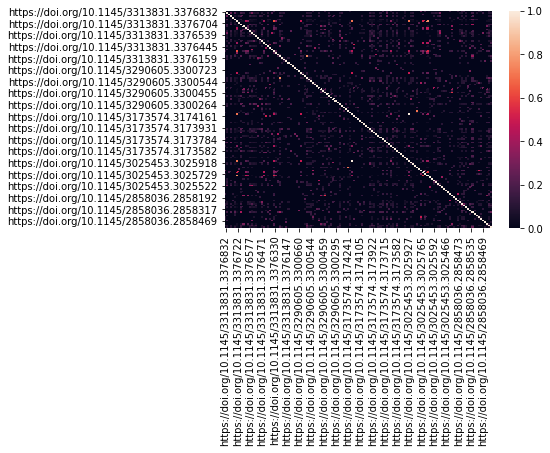

In [237]:
# Heatmap of paper keywords pairwise cosine similarities
import seaborn as sns

heatmap = sns.heatmap(cosine_similarities)

In [238]:
# Filter out highest cosine similarities from full similarity matrix
cosine_similarities_high = cosine_similarities.filter(items=highest_cosine_similarities["doi_1"].unique()).loc[highest_cosine_similarities["doi_2"].unique()]
cosine_similarities_high

https://doi.org/10.1145/3173574.3174164  \
https://doi.org/10.1145/3025453.3025927                                 1.000000   
https://doi.org/10.1145/3025453.3025683                                 0.386244   
https://doi.org/10.1145/3290605.3300608                                 0.000000   
https://doi.org/10.1145/3025453.3025875                                 0.000000   
https://doi.org/10.1145/3173574.3174164                                 1.000000   
https://doi.org/10.1145/3313831.3376330                                 0.455842   
https://doi.org/10.1145/2858036.2858225                                 0.000000   

                                         https://doi.org/10.1145/3313831.3376722  \
https://doi.org/10.1145/3025453.3025927                                 0.709575   
https://doi.org/10.1145/3025453.3025683                                 0.769391   
https://doi.org/10.1145/3290605.3300608                                 0.065372   
https://doi.org/10.1145/3025453.3025875                                 0.032686   
https://doi.org/10.1145/3173574.3174164                                 0.709575   
https://doi.org/10.1145/3313831.3376330                                 0.630062   
https://doi.org/10.1145/2858036.2858225                                 0.043853   

                                         https://doi.org/10.1145/3313831.3376270  \
https://doi.org/10.1145/3025453.3025927                                 0.000000   
https://doi.org/10.1145/3025453.3025683                                 0.060523   
https://doi.org/10.1145/3290605.3300608                                 0.755929   
https://doi.org/10.1145/3025453.3025875                                 0.000000   
https://doi.org/10.1145/3173574.3174164                                 0.000000   
https://doi.org/10.1145/3313831.3376330                                 0.000000   
https://doi.org/10.1145/2858036.2858225                                 0.000000   

                                         https://doi.org/10.1145/3173574.3174241  \
https://doi.org/10.1145/3025453.3025927                                 0.000000   
https://doi.org/10.1145/3025453.3025683                                 0.000000   
https://doi.org/10.1145/3290605.3300608                                 0.000000   
https://doi.org/10.1145/3025453.3025875                                 0.710669   
https://doi.org/10.1145/3173574.3174164                                 0.000000   
https://doi.org/10.1145/3313831.3376330                                 0.000000   
https://doi.org/10.1145/2858036.2858225                                 0.000000   

                                         https://doi.org/10.1145/3025453.3025744  \
https://doi.org/10.1145/3025453.3025927                                 0.269680   
https://doi.org/10.1145/3025453.3025683                                 0.572892   
https://doi.org/10.1145/3290605.3300608                                 0.000000   
https://doi.org/10.1145/3025453.3025875                                 0.000000   
https://doi.org/10.1145/3173574.3174164                                 0.269680   
https://doi.org/10.1145/3313831.3376330                                 0.338062   
https://doi.org/10.1145/2858036.2858225                                 0.000000   

                                         https://doi.org/10.1145/3290605.3300455  \
https://doi.org/10.1145/3025453.3025927                                 0.000000   
https://doi.org/10.1145/3025453.3025683                                 0.050637   
https://doi.org/10.1145/3290605.3300608                                 0.105409   
https://doi.org/10.1145/3025453.3025875                                 0.105409   
https://doi.org/10.1145/3173574.3174164                                 0.000000   
https://doi.org/10.1145/3313831.3376330                                 0.239046   
https://doi.org/10.1145/2858036.2858225                                 0.565685   

   

In [245]:
# Create similarity matrix with keywords instead of DOIs
cosine_similarities_high_keywords = cosine_similarities_high
cosine_similarities_high_keywords.index.name = "doi"
cosine_similarities_high_keywords = cosine_similarities_high_keywords.join(best_papers[["doi", "joined_keywords"]].set_index("doi"))
cosine_similarities_high_keywords = cosine_similarities_high_keywords.reset_index()
dois_to_lookup = cosine_similarities_high_keywords.drop(["doi", "joined_keywords"], axis=1).columns
dois_to_lookup_with_keywords = best_papers[["doi", "joined_keywords"]].set_index("doi").loc[dois_to_lookup]
dois_to_keywords_mapping = {f"{doi}": values["joined_keywords"] for doi, values in dois_to_lookup_with_keywords.to_dict('index').items()}
cosine_similarities_high_keywords = cosine_similarities_high_keywords.rename(columns=dois_to_keywords_mapping)
cosine_similarities_high_keywords = cosine_similarities_high_keywords.drop(["doi"], axis=1)
cosine_similarities_high_keywords = cosine_similarities_high_keywords.set_index("joined_keywords")
cosine_similarities_high_keywords

procedural augmented reality; generative augmented reality; programming  \
joined_keywords                                                                                                               
procedural augmented reality; generative augmen...                                           1.000000                         
co-located virtual reality; sharevr; asymmetric...                                           0.386244                         
voice user interfaces; visual impairment; educa...                                           0.000000                         
privacy; security; user study; intimate partner...                                           0.000000                         
procedural augmented reality; generative augmen...                                           1.000000                         
augmented/virtual reality; interaction tracking...                                           0.455842                         
user experience; meaning; eudaimonia; hedonic                                                0.000000                         

                                                    augmented reality/virtual reality authoring; augmented reality; virtual reality; end-user development; augmented reality/virtual reality development; augmented reality/virtual reality design  \
joined_keywords                                                                                                                                                                                                                                      
procedural augmented reality; generative augmen...                                           0.709575                                                                                                                                                
co-located virtual reality; sharevr; asymmetric...                                           0.769391                                                                                                                                                
voice user interfaces; visual impairment; educa...                                           0.065372                                                                                                                                                
privacy; security; user study; intimate partner...                                           0.032686                                                                                                                                                
procedural augmented reality; generative augmen...                                           0.709575                                                                                                                                                
augmented/virtual reality; interaction tracking...                                           0.630062                                                                                                                                                
user experience; meaning; eudaimonia; hedonic                                                0.043853                                                                                                                                                

                                                    inclusion; visual impairment; games; education; co-design  \
joined_keywords                                                                                                 
procedural augmented reality; generative augmen...                                           0.000000           
co-located virtual reality; sharevr; asymmetric...                                           0.060523           
voice user interfaces; visual impairment; educa...                                           0.755929           
privacy; security; user study; intimate partner...                                           0.000000           
procedural augm

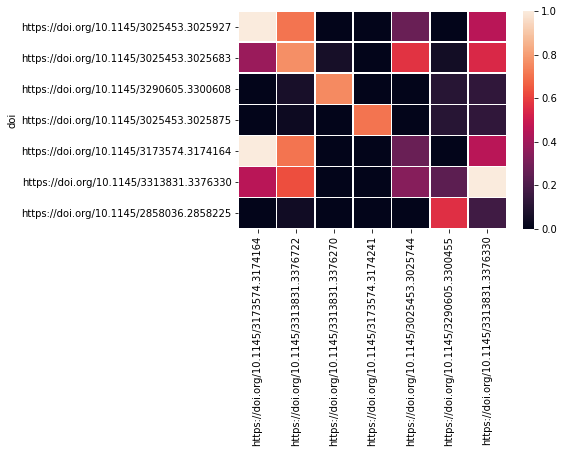

In [246]:
# Display heatmap (DOIs)
heatmap_highest_dois = sns.heatmap(cosine_similarities_high, linewidths=.5)

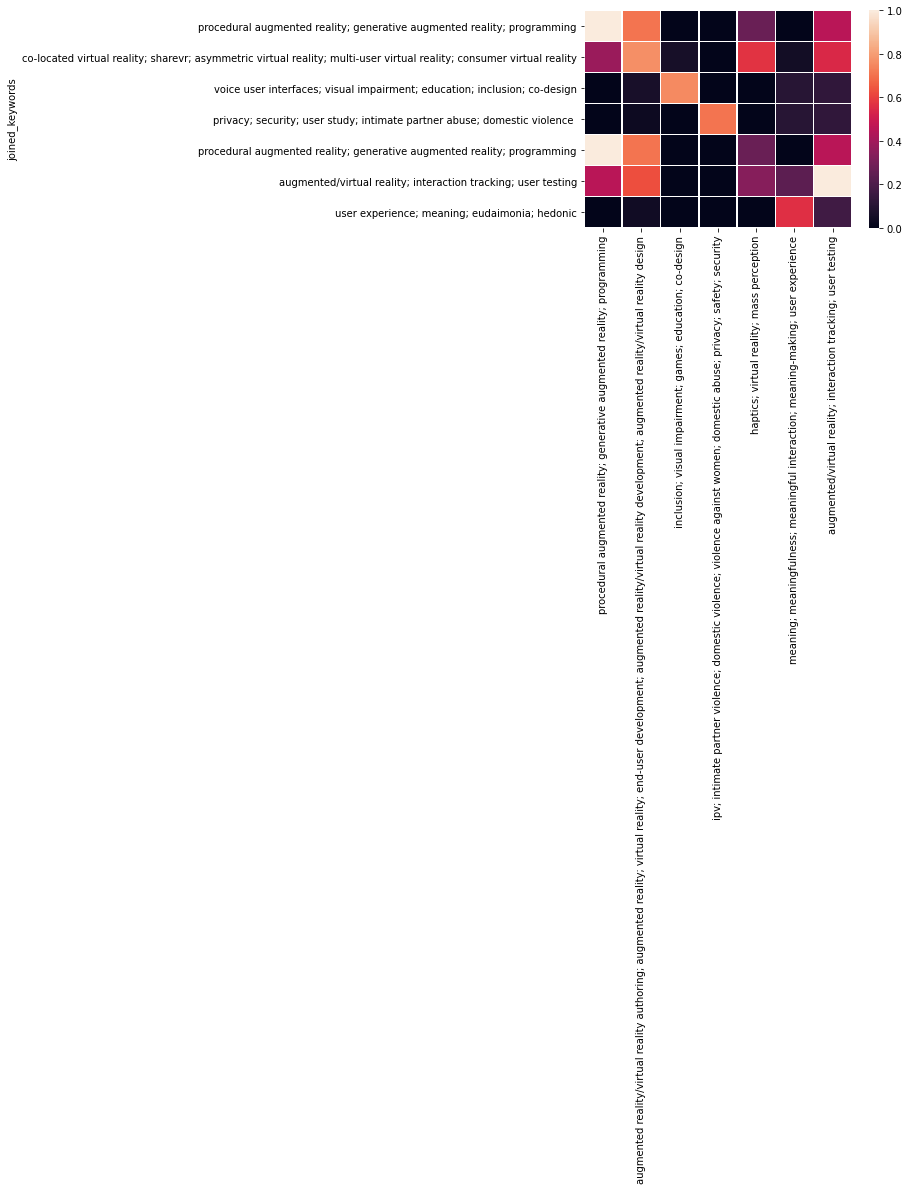

In [247]:
# Display heatmap (keywords)
heatmap_highest_keywords = sns.heatmap(cosine_similarities_high_keywords, linewidths=.5)

## Topic Modeling

In [171]:
from sklearn.manifold import TSNE
from gensim.models import word2vec

SIZE = 5
WINDOW = 3
WORKERS = 4

def build_corpus(keywords_list:[[str]], separator=" ") -> [[str]]:
    """Splits multi-word keyboards by separator."""
    corpus = []
    for keywords in keywords_list:
        updated_keywords = []
        for keyword in keywords:
            split_keyword = keyword.split(separator)
            for word in split_keyword:
                updated_keywords.append(word)
        corpus.append(updated_keywords)
    return corpus

corpus = list(best_papers["keywords"])
#corpus = build_corpus(list(best_papers["keywords"]))
#print(corpus)

model = word2vec.Word2Vec(corpus, size=SIZE, window=WINDOW, min_count=1, workers=WORKERS)
#print(model.wv["privacy"])

<ipython-input-179-078edb51f462>:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


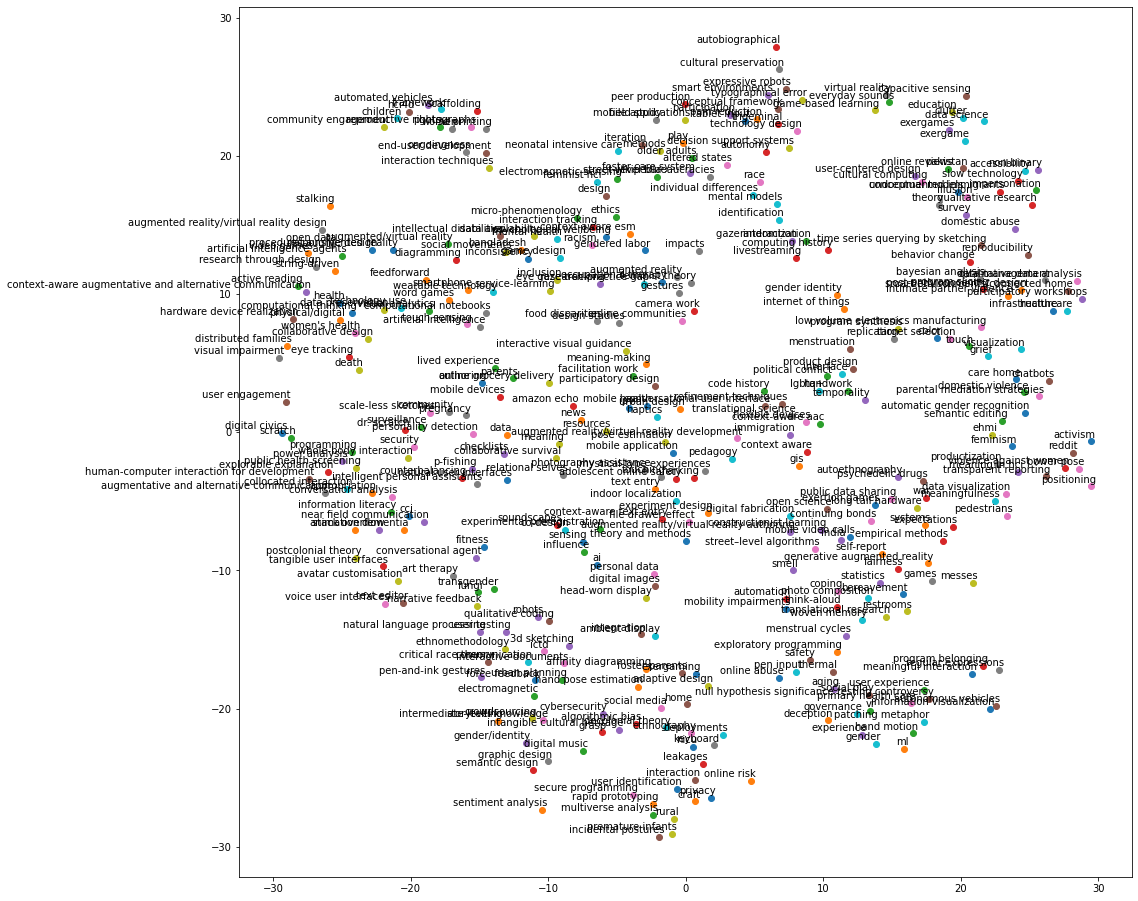

<ipython-input-179-078edb51f462>:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


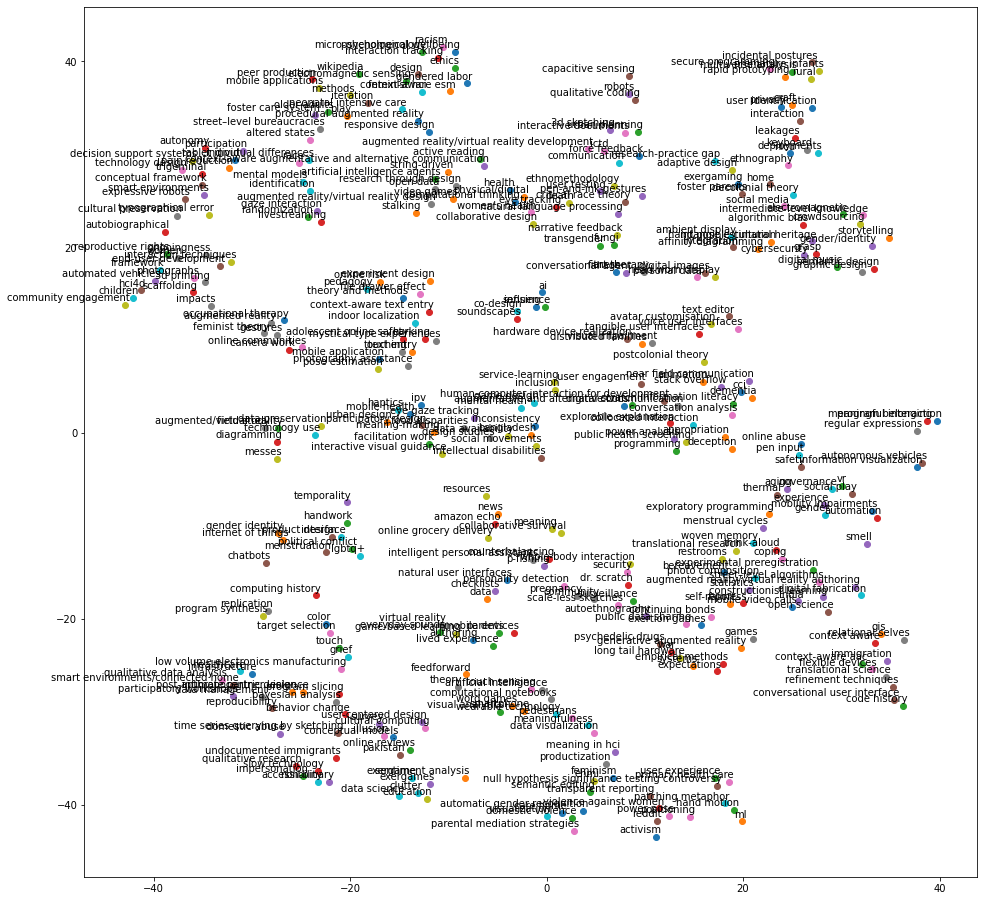

<ipython-input-179-078edb51f462>:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


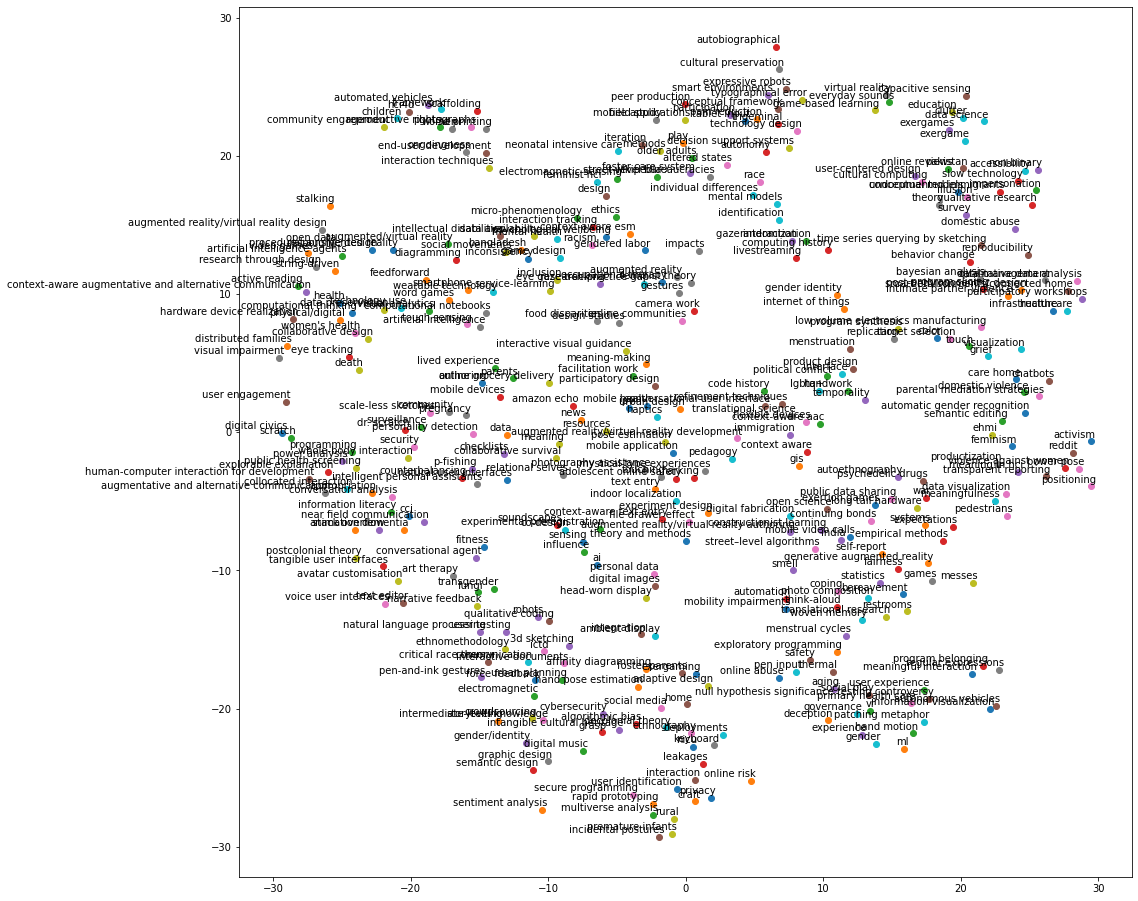

In [179]:
import matplotlib.pyplot as plt

def tsne_plot(model, perplexity=20):
    """Creates a TSNE model and plots it."""
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=perplexity, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(model)
tsne_plot(model, perplexity=10)
tsne_plot(model, perplexity=20)

<ipython-input-179-078edb51f462>:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


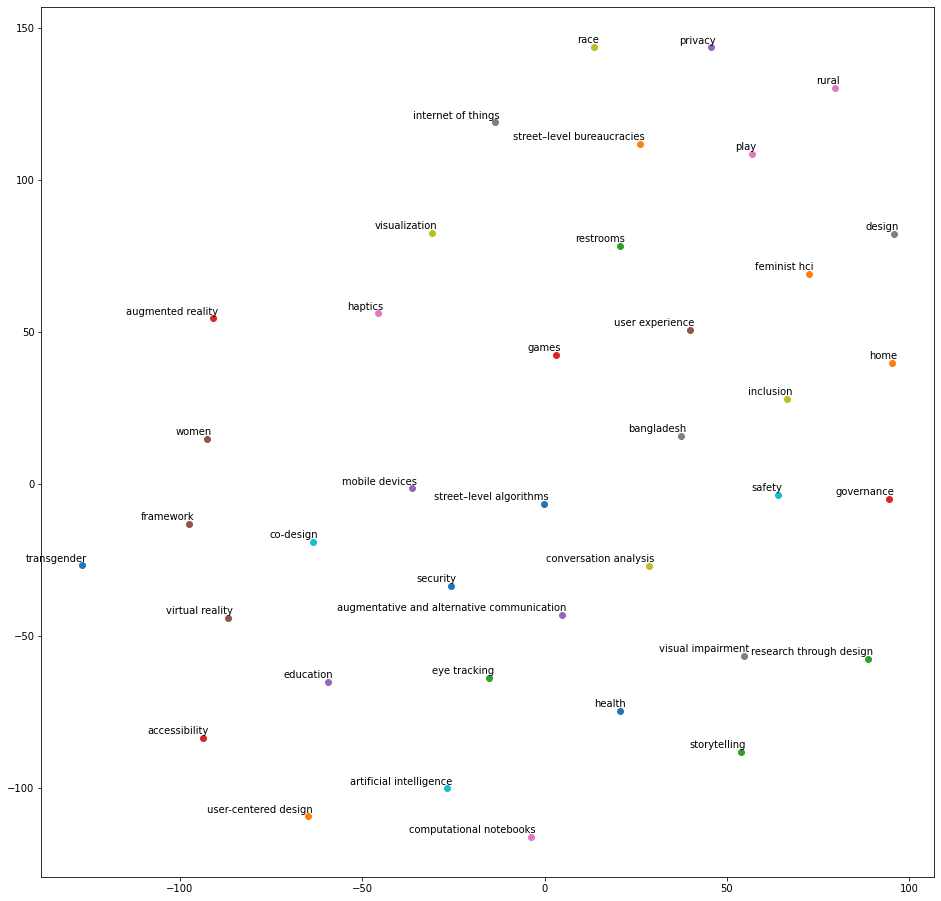

<ipython-input-179-078edb51f462>:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


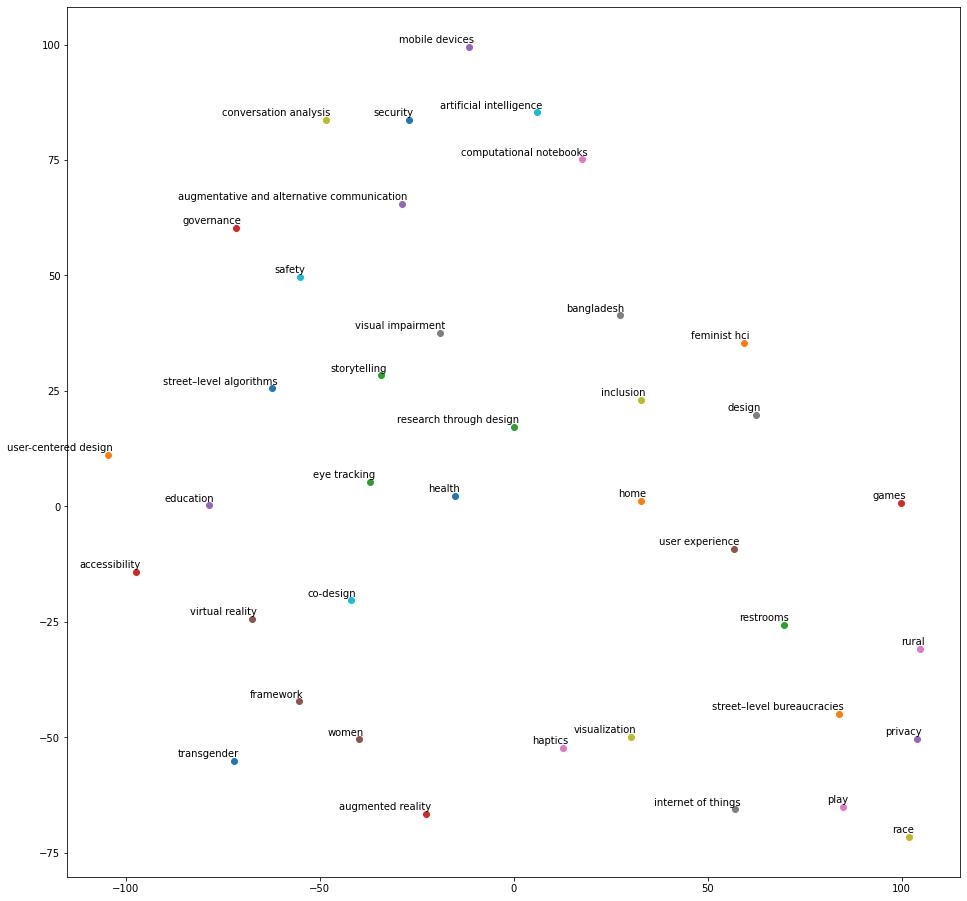

<ipython-input-179-078edb51f462>:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


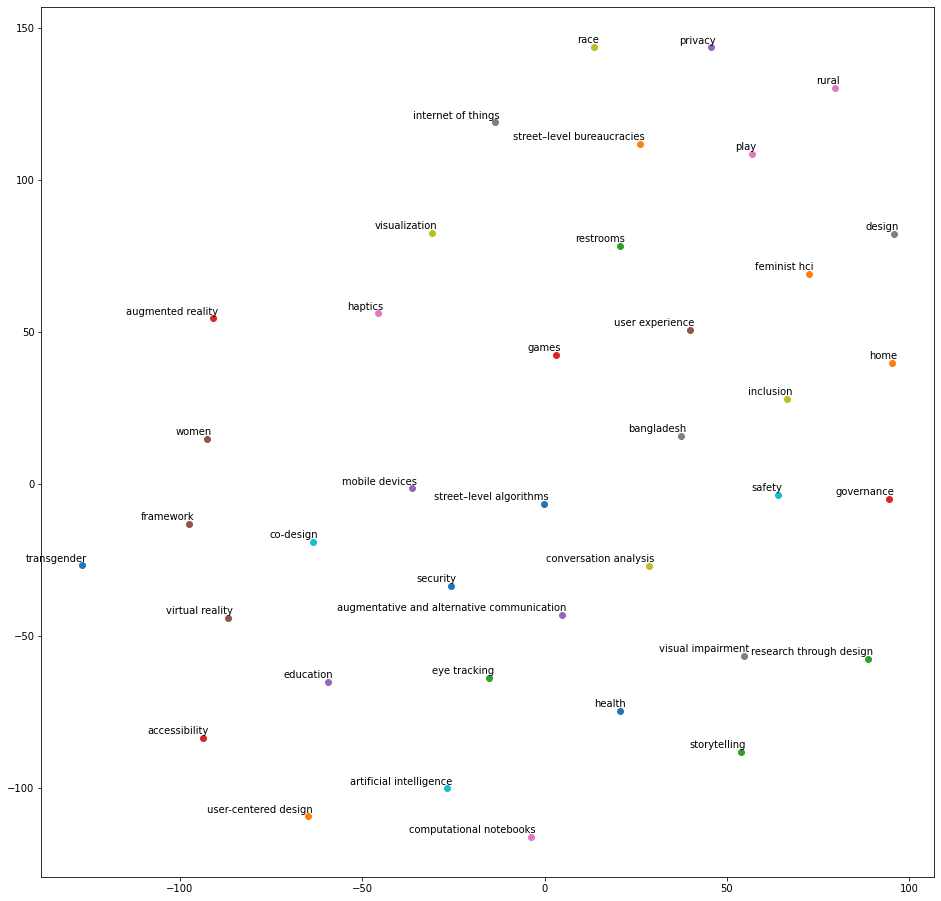

In [180]:
# A more selective model
selective_model = word2vec.Word2Vec(corpus, size=SIZE, window=WINDOW, min_count=2, workers=WORKERS)
tsne_plot(selective_model)
tsne_plot(selective_model, perplexity=10)
tsne_plot(selective_model, perplexity=20)

## To Do

- [ ] topic modeling using LSA vs LDA
- [ ] training/test split (e.g. 90/10)
- [ ] repeatedly evaluate cosine similarity on test set between count vectors (co-occurence of words) of
    - papers within topics (should be high; similar keywords within topics)
    - topics (should be low; different keywords between topics)
- [ ] try stemming?
- [ ] heatmap of similar individual keywords
- [x] heatmap of similar papers (keyword lists) => table of, for example, top 10 similar keyword lists
- [x] include more best papers
- [ ] include honorable mentions?
- [ ] maybe retrieve some info via CrossRef API?
- [ ] splitting combined expressions (e.g. AR/VR)?
- [ ] check correlation with CCS concepts?